
<a id='linear-algebra'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Álgebra Linear


<a id='index-0'></a>

## Sumário

- [Álgebra Linear](#Álgebra-Linear)  
  - [Resumo](#Resumo)  
  - [Vetores](#Vetores)  
  - [Matrizes](#Matrizes)  
  - [Resolvendo Sistemas de Equações](#Resolvendo-Sistemas-de-Equações)  
  - [Autovalores e Autovetores](#Autovalores-e-Autovetores)  
  - [Tópicos Adicionais](#Tópicos-Adicionais)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://julia.quantecon.org/) pelos bolsistas CNPq Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob a supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

A álgebra linear é um dos ramos mais utilizados da matemática aplicada por economistas.

Por exemplo, muitos problemas aplicados em economia e finanças requerem como solução um sistema de equações lineares, tal como:

$$
\begin{array}{c}
    y_1 = a x_1 + b x_2 \\
    y_2 = c x_1 + d x_2
\end{array}
$$

ou, de maneira mais genérica,


<a id='equation-la-se'></a>
$$
\begin{array}{c}
    y_1 = a_{11} x_1 + a_{12} x_2 + \cdots + a_{1k} x_k \\
    \vdots  \\
    y_n = a_{n1} x_1 + a_{n2} x_2 + \cdots + a_{nk} x_k
\end{array} \tag{1}
$$

O objetivo aqui é resolver para as "desconhecidas” $ x_1, \ldots, x_k $ dados $ a_{11}, \ldots, a_{nk} $ e $ y_1, \ldots, y_n $

Ao considerar tais problemas, é essencial que nós consideremos primeiro ao menos algumas das seguintes questões:

- Existe realmente uma solução?  
- Existem de fato muitas soluções, e se sim, como deveríamos interpretá-las?  
- Se a solução não existe, há uma solução mais "aproximada"?  
- Se a solução existe, como deveríamos computá-la?  


Esses são os tipos de tópicos endereçados pela álgebra linear.

Nesta aula, nós iremos cobrir o básico da álgebra linear e matricial, treinando a teoria e o computacional de ambos.

Admitimos algumas superposições [nessa aula](https://lectures.quantecon.org/getting_started_julia/fundamental_types.html), onde as operações com matrizes no Julia foram explicadas de início.

Perceba que esta aula é mais teórica que a maioria, e contém um material de revisão que será usado por nós em aplicações no decorrer do curso.

## Vetores


<a id='index-2'></a>
Um *vetor* é um elemento de um espaço vetorial.

Vetores podem ser adicionados conjuntamente e multiplicados por escalares.

Podem ser escritos como $ x = [x_1, \ldots, x_n] $

O conjunto de todos os $ n $-vetores é denotado por $ \mathbb R^n $

Por exemplo, $ \mathbb R ^2 $ é o plano, e um vetor em $ \mathbb R^2 $ é apenas um ponto no plano.

Tradicionalmente, vetores são representados visualmente como linhas, da origem até o ponto.

A figura a seguir representa três vetores dessa maneira:

### Configuração

In [ ]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true);

In [1]:
using LinearAlgebra, Statistics, Plots
gr(fmt=:png);

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1273


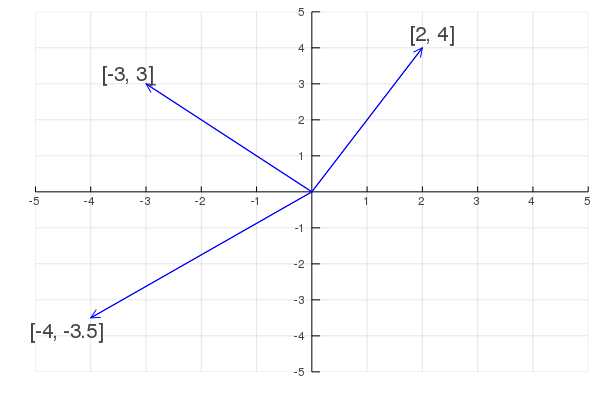

In [2]:
x_vals = [0 0 0 ; 2 -3 -4]
y_vals = [0 0 0 ; 4 3 -3.5]

plot(x_vals, y_vals, arrow = true, color = :blue,
     legend = :none, xlims = (-5, 5), ylims = (-5, 5),
     annotations = [(2.2, 4.4, "[2, 4]"),
                    (-3.3, 3.3, "[-3, 3]"),
                    (-4.4, -3.85, "[-4, -3.5]")],
     xticks = -5:1:5, yticks = -5:1:5,
     framestyle = :origin)

### Operações com Vetores


<a id='index-3'></a>
Os dois operadores mais comuns para vetores são a adição e a multiplicação por escalar, que descreveremos agora.

Por uma questão de definição, quando nós adicionamos dois vetores, adicionamos a eles um elemento por cada:

$$
x + y
=
\left[
\begin{array}{c}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
\end{array}
\right]
+
\left[
\begin{array}{c}
     y_1 \\
     y_2 \\
    \vdots \\
     y_n
\end{array}
\right]
:=
\left[
\begin{array}{c}
    x_1 + y_1 \\
    x_2 + y_2 \\
    \vdots \\
    x_n + y_n
\end{array}
\right]
$$

Multiplicação por escalar é uma operação que pega um número $ \gamma $ e um vetor $ x $, produzindo:

$$
\gamma x
:=
\left[
\begin{array}{c}
    \gamma x_1 \\
    \gamma x_2 \\
    \vdots \\
    \gamma x_n
\end{array}
\right]
$$

A multiplicação por escalar é ilustrada na próxima figura:

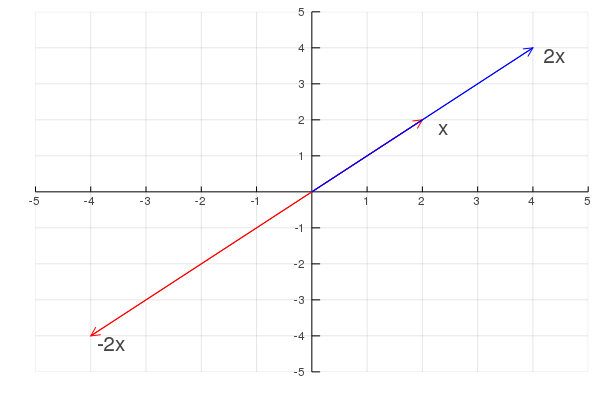

In [3]:
# Ilustra a multiplicação escalar

x = [2]
scalars = [-2 1 2]
vals = [0 0 0; x * scalars]
labels = [(-3.6, -4.2, "-2x"), (2.4, 1.8, "x"), (4.4, 3.8, "2x")]

plot(vals, vals, arrow = true, color = [:red :red :blue],
     legend = :none, xlims = (-5, 5), ylims = (-5, 5),
     annotations = labels, xticks = -5:1:5, yticks = -5:1:5,
     framestyle = :origin)

No Julia, um vetor pode ser representado como uma matriz de uma dimensão.

Matrizes no Julia nos permitem expressar a multiplicação por escalar e adição com uma sintaxe bastante natural:

In [4]:
x = ones(3)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [5]:
y = [2, 4, 6]

3-element Array{Int64,1}:
 2
 4
 6

In [6]:
x + y

3-element Array{Float64,1}:
 3.0
 5.0
 7.0

In [7]:
4x  # equivalente a 4 * x e 4 .* x

3-element Array{Float64,1}:
 4.0
 4.0
 4.0

### Produto Interno e Norma


<a id='index-5'></a>
O *produto interno* dos vetores $ x,y \in \mathbb R ^n $ é definido como

$$
x' y := \sum_{i=1}^n x_i y_i
$$

Dois vetores são chamados de *ortogonais* se o seu produto interno for zero.

A *norma* de um vetor $ x $ representa seu “comprimento” (isto é, a distância para o vetor zero), sendo definida como:

$$
\| x \| := \sqrt{x' x} := \left( \sum_{i=1}^n x_i^2 \right)^{1/2}
$$

A expressão $ \| x - y\| $ é pensada como a distância entre $ x $ e $ y $.

Continuando do exemplo prévio, o produto interno e a norma podem ser computados como:

In [8]:
using LinearAlgebra

In [9]:
dot(x, y)               # Produto interno de x e y

12.0

In [10]:
sum(prod, zip(x, y))    # dá no mesmo resultado

12.0

In [11]:
norm(x)                 # Norma de x

1.7320508075688772

In [12]:
sqrt(sum(abs2, x))         # dá no mesmo resultado

1.7320508075688772

### Período


<a id='index-6'></a>
Dado um conjunto de vetores $ A := \{a_1, \ldots, a_k\} $ em $ \mathbb R ^n $, é natural pensar sobre os novos vetores que nós podemos criá-los por meio de operadores lineares.

Novos vetores criados dessa maneira são chamados *combinações lineares* de $ A $.

Particularmente, $ y \in \mathbb R ^n $ é uma combinação linear de $ A := \{a_1, \ldots, a_k\} $ se:

$$
y = \beta_1 a_1 + \cdots + \beta_k a_k
\text{ for some scalars } \beta_1, \ldots, \beta_k
$$

Nesse contexto, os valores $ \beta_1, \ldots, \beta_k $ são denominados *coeficientes* da combinação linear.

O conjunto de combinações lineares de $ A $ é chamado de *período* de $ A $.

A próxima figura mostra o período de $ A = \{a_1, a_2\} $ em $ \mathbb R ^3 $:

O período é um plano bi-dimensional que passa nesses dois pontos, além da origem:


<a id='la-3dvec'></a>

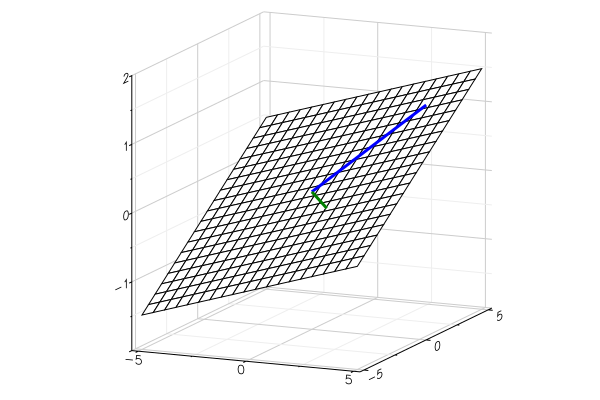

In [13]:
# funções lineares fixas, para gerar o plano
f(x, y) = 0.2x + 0.1y

# lines to vectors
x_vec = [0 0; 3 3]
y_vec = [0 0; 4 -4]
z_vec = [0 0; f(3, 4) f(3, -4)]

# desenhando o plano
n = 20
grid = range(-5, 5, length = n)
z2 = [ f(grid[row], grid[col]) for row in 1:n, col in 1:n ]
wireframe(grid, grid, z2, fill = :blues, gridalpha =1 )
plot!(x_vec, y_vec, z_vec, color = [:blue :green], linewidth = 3, labels = "",
      colorbar = false)

#### Exemplos

Se $ A $ contém apenas um vetor $ a_1 \in \mathbb R ^2 $, então o período são os multiplicadores escalares de $ a_1 $, que é a única linha que atravessa ambos $ a_1 $ e a origem.

Se $ A = \{e_1, e_2, e_3\} $ consiste nos *vetores de base canônica* de $ \mathbb R ^3 $, que é

$$
e_1
:=
\left[
\begin{array}{c}
     1 \\
     0 \\
     0
\end{array}
\right]
, \quad
e_2
:=
\left[
\begin{array}{c}
     0 \\
     1 \\
     0
\end{array}
\right]
, \quad
e_3
:=
\left[
\begin{array}{c}
     0 \\
     0 \\
     1
\end{array}
\right]
$$

então o período de $ A $ é tudo de $ \mathbb R ^3 $, pois, para qualquer $ x = (x_1, x_2, x_3) \in \mathbb R ^3 $, podemos escrever:

$$
x = x_1 e_1 + x_2 e_2 + x_3 e_3
$$

Agora considere $ A_0 = \{e_1, e_2, e_1 + e_2\} $

Se $ y = (y_1, y_2, y_3) $ é qualquer combinação linear destes vetores, então $ y_3 = 0 $ (checar)

Consequentemente, $ A_0 $ falha em periodizar tudo de $ \mathbb R ^3 $


<a id='la-li'></a>

### Independência Linear

<a id='index-7'></a>
Como nós veremos, é frequentemente desejável encontrar famílias de vetores com períodos relativamente mais longos, assim muitos vetores podem ser descritos como operadores lineares de alguns vetores.

A condição necessária para um conjunto de vetores ter um grande período é o que se chama de independência linear.

Em particular, uma coleção de vetores $ A := \{a_1, \ldots, a_k\} $ in $ \mathbb R ^n $ é dita ser:

- *Linearmente dependente* se algum subconjunto estrito de $ A $ tem o mesmo espaço $ A $  
- *linearmente independente* caso não seja linearmente dependente.


Colocando diferentemente, um conjunto de vetores é linearmente independente se não houver vetor redundante no espaço, e linearmente dependente caso contrário.

Para ilustrar essa idéia, recorde [a figura](#la-3dvec) quqe mostrou o espaço dos vetores $ \{a_1, a_2\} $ em $ \mathbb R ^3 $ como um plano através da origem.

Se pegarmos um terceiro vetor $ a_3 $ e formar o conjunto $ \{a_1, a_2, a_3\} $, esse confunto será:

- linearmente dependente se $ a_3 $ encontrar-se no plano, e  
- linearmente independente caso contrário.


Como outra ilustração do conceito, desde que $ \mathbb R ^n $ possa ser espaçado por $ n $ vetores (veja a discussão sobre vetores e base canônica), qualquer coleção de $ m > n $ vetores em $ \mathbb R ^n $ deve ser linearmente dependente.

As afirmações a seguir são equivalentes à independência linear de $ A := \{a_1, \ldots, a_k\} \subset \mathbb R ^n $

1. Vetores em $ A $ não podem ser formados como uma combinação linear de outros elementos;  
1. Se $ \beta_1 a_1 + \cdots \beta_k a_k = 0 $ para os escalares $ \beta_1, \ldots, \beta_k $, então $ \beta_1 = \cdots = \beta_k = 0 $  


(O zero na primeira expressão é a origem de $ \mathbb R ^n $).


<a id='la-unique-reps'></a>

### Representações Únicas

Ouutra coisa boa sobre conjuntos de vetores linearmente independentes é que cada elemento no espaço tem uma representação única como combinação linear destes vetores.

Em outras palavras, se $ A := \{a_1, \ldots, a_k\} \subset \mathbb R ^n $ é linearmente independente e 

$$
y = \beta_1 a_1 + \cdots \beta_k a_k
$$

então nenhma outra sequência de coeficiente $ \gamma_1, \ldots, \gamma_k $ irá produzir o mesmo vetor $ y $.

De fato, se nós tivermos também $ y = \gamma_1 a_1 + \cdots \gamma_k a_k $, então

$$
(\beta_1 - \gamma_1) a_1 + \cdots + (\beta_k - \gamma_k) a_k = 0
$$

Agora, independência linear implica $ \gamma_i = \beta_i $ para todo $ i $.

## Matrizes


<a id='index-8'></a>
Matrizes são uma manera elegante de se organizar dados em operações lineares.

Uma matriz $ n \times k $ é um arranjo retangular $ A $ de números com $ n $ linhas e $ k $ colunas:

$$
A =
\left[
\begin{array}{cccc}
    a_{11} & a_{12} & \cdots & a_{1k} \\
    a_{21} & a_{22} & \cdots & a_{2k} \\
    \vdots & \vdots &  & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nk}
\end{array}
\right]
$$

Frequentemente, os números da matriz representam coeficientes de um sistema de equações lineares, como foi discutido no começo dessa aula.

Por razões óbvias, a matriz $ A $ também é chamado de vetor se $ n = 1 $ ou $ k = 1 $.

No caso formal, $ A $ é chamado de *vetor linha*, enquanto que no último é chamado de *vetor coluna*.

Se $ n = k $, então $ A $ é denominada *quadrada*.

A matriz formada pela substituição de $ a_{ij} $ por $ a_{ji} $ para todo $ i $ e $ j $ é chamada de *transposta* de $ A $, e denotada $ A' $ ou $ A^{\top} $.

Se $ A = A' $, então $ A $ é chamada de *simétrica*.

Para uma matriz quadrada $ A $, os $ i $ elementos da forma $ a_{ii} $ para $ i=1,\ldots,n $, são chamados de *diagonal principal*.

$ A $ é dita *diagonal* se apenas valores não-nulos estiverem na diagonal principal.

Se, além de ser diagonal, cada elemento na diagonal principal é igual a 1, então $ A $ é chamada de *matriz identidade*, sendo denotada por $ I $.

### Operações com Matrizes


<a id='index-9'></a>
Tal como no caso dos vetores, há um número de operaões algébricas definido para matrizes.

Adição e multiplicação por escalar são generalizações imediatas do caso vetorial:

$$
\gamma A
=
\gamma
\left[
\begin{array}{ccc}
    a_{11} &  \cdots & a_{1k} \\
    \vdots & \vdots  & \vdots \\
    a_{n1} &  \cdots & a_{nk} \\
\end{array}
\right]
:=
\left[
\begin{array}{ccc}
    \gamma a_{11} & \cdots & \gamma a_{1k} \\
    \vdots & \vdots & \vdots \\
    \gamma a_{n1} & \cdots & \gamma a_{nk} \\
\end{array}
\right]
$$

e

$$
A + B =
\left[
\begin{array}{ccc}
    a_{11} & \cdots & a_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} & \cdots & a_{nk} \\
\end{array}
\right]
+
\left[
\begin{array}{ccc}
    b_{11} & \cdots & b_{1k} \\
    \vdots & \vdots & \vdots \\
    b_{n1} & \cdots & b_{nk} \\
\end{array}
\right]
:=
\left[
\begin{array}{ccc}
    a_{11} + b_{11} &  \cdots & a_{1k} + b_{1k} \\
    \vdots & \vdots & \vdots \\
    a_{n1} + b_{n1} &  \cdots & a_{nk} + b_{nk} \\
\end{array}
\right]
$$

No último caso, as matrizes devem ter a mesma forma de acordo com a definição para que haja sentido.

Também temos uma convenção para *multiplicar* duas matrizes

A regra para multiplicação de matrizes generaliza a idéia dos produtos internos (discutidos anteriormente), e foi projetado para fazer a multiplicação funcionar bem com operações lineares básicas.

Se $ A $ e $ B $ são duas matrizes, então seu produto $ A B $ é formado obtendo como o $ i,j $-ésimo elemento o produto interno da $ i $-ésima linha de $ A $ e a $ j $-ésima coluna de $ B $.

Há vários tutoriais para lhe ajudar a visualisar a operação, como [este](http://www.mathsisfun.com/algebra/matrix-multiplying.html), ou a discussão na [página da Wikipedia](https://en.wikipedia.org/wiki/Matrix_multiplication).

Se $ A $ é $ n \times k $ e $ B $ é $ j \times m $,então para multiplicar $ A $ e $ B $ nós requerimos $ k = j $, sendo que a a matriz resultante $ A B $ é $ n \times m $.

Como talvez o caso especial mais importante, considere a multiplicação de $ n \times k $ matrix $ A $ e $ k \times 1 $ pelo vetor-coluna $ x $.

De acordo com a regra anterior, isso nos dá um vetor coluna $ n \times 1 $.


<a id='equation-la-atx'></a>
$$
A x =
\left[
\begin{array}{ccc}
    a_{11} &  \cdots & a_{1k} \\
    \vdots & \vdots  & \vdots \\
    a_{n1} &  \cdots & a_{nk}
\end{array}
\right]
\left[
\begin{array}{c}
    x_{1}  \\
    \vdots  \\
    x_{k}
\end{array}
\right] :=
\left[
\begin{array}{c}
    a_{11} x_1 + \cdots + a_{1k} x_k \\
    \vdots \\
    a_{n1} x_1 + \cdots + a_{nk} x_k
\end{array}
\right] \tag{2}
$$

>**Observação**
>
>$ A B $ e $ B A $ geralmente, não são a mesma coisa.

Outro caso especial da matriz identidade:

Você pode checar que, se $ A $ é $ n \times k $ e $ I $ é $ k \times k $ a matriz identidade, então $ AI = A $.

Se $ I $ é $ n \times n $ a matriz identidade, então $ IA = A $.

### Matrizes no Julia

Arranjos no Julia podem ser usados como matrizes, tendo funções e métodos rápidos e eficientes para toda e qualquer operação padrão com matrizes.

Você também poderá criá-las como a seguir:

In [14]:
A = [1 2
     3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [15]:
typeof(A)

Array{Int64,2}

In [16]:
size(A)

(2, 2)

A função `size` retorna uma tupla, fornecendo o número de linhas e colunas.

Para obter a transposta de `A`, use `transpose(A)` ou, mais facilmente, `A'`.

Há muitas funções convenientes para se criar matrizes (matrizes de zero, um, etc.) — veja [aqui](https://lectures.quantecon.org/getting_started_julia/fundamental_types.html#creating-arrays).

Como as operações são executadas elemento-a-elemento padronizadamente, a adição e multiplicação por escalar tem uma sintaxe muito natural.

In [17]:
A = ones(3, 3)

3×3 Array{Float64,2}:
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [18]:
2I

UniformScaling{Int64}
2*I

In [19]:
A + I

3×3 Array{Float64,2}:
 2.0  1.0  1.0
 1.0  2.0  1.0
 1.0  1.0  2.0

Para multiplicar matrizes, utilizamos o operador `*`.

Particularmente, `A * B` é uma multiplicação matricial, enquanto que `A .* B` é a multiplicação de elemento por elemento.


<a id='la-linear-map'></a>

### Matrizes como Mapas


<a id='index-10'></a>
Cada $ n \times k $ matriz $ A $ pode ser identificada com uma função $ f(x) = Ax $ quqe mapeia $ x \in \mathbb R ^k $ dentro de $ y = Ax \in \mathbb R ^n $.

Esses tipos de funções tem uma propriedade especial: elas são *lineares*.

Uma função $ f \colon \mathbb R ^k \to \mathbb R ^n $ é chamada *linear* se, para todo $ x, y \in \mathbb R ^k $ e todos os escalares $ \alpha, \beta $, nós tivermos

$$
f(\alpha x + \beta y) = \alpha f(x) + \beta f(y)
$$

Você pode checar se isso permanece para a função $ f(x) = A x + b $ quando $ b $ for o vetor nulo, e se falha quando $ b $ é não-nulo.

De fato, é [conhecido](https://en.wikipedia.org/wiki/Linear_map#Matrices) que $ f $ é linear se *e somente se* ali existir uma matriz $ A $ tal que $ f(x) = Ax $ para todo $ x $.

## Resolvendo Sistemas de Equações


<a id='index-11'></a>
Recordando o sistema de equações [(1)](#equation-la-se)

Se nós compararmos [(1)](#equation-la-se) e [(2)](#equation-la-atx), veremos que [(1)](#equation-la-se) pode agora, ser reescrita como


<a id='equation-la-se2'></a>
$$
y = Ax \tag{3}
$$

Temos agora um problema para determinar um vetor $ x \in \mathbb R ^k $ que solucione [(3)](#equation-la-se2),tomando $ y $ e $ A $ como dado.

Isso é um caso especial de um problema mais genrealizado: encontrar $ x $ tal que $ y = f(x) $.

Dando uma função arbitrária $ f $ e um $ y $, sempre haverá $ x $ tal que $ y = f(x) $?

Então, é sempre algo único?

A próxima figura mostra que a resposta para ambos é negativa.

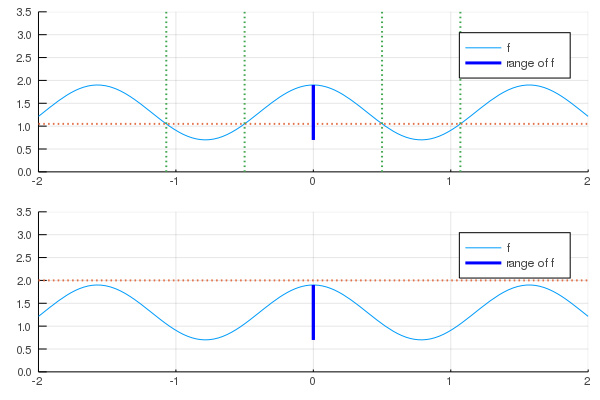

In [20]:
f(x) = 0.6cos(4x) + 1.3
grid = range(-2, 2, length = 100)
y_min, y_max = extrema( f(x) for x in grid )
plt1 = plot(f, xlim = (-2, 2), label = "f")
hline!(plt1, [f(0.5)], linestyle = :dot, linewidth = 2, label = "")
vline!(plt1, [-1.07, -0.5, 0.5, 1.07], linestyle = :dot, linewidth = 2, label = "")
plot!(plt1, fill(0, 2), [y_min y_min; y_max y_max], lw = 3, color = :blue,
      label = ["range of f" ""])
plt2 = plot(f, xlim = (-2, 2), label = "f")
hline!(plt2, [2], linestyle = :dot, linewidth = 2, label = "")
plot!(plt2, fill(0, 2), [y_min y_min; y_max y_max], lw = 3, color = :blue,
      label = ["range of f" ""])
plot(plt1, plt2, layout = (2, 1), ylim = (0, 3.5))

No primeiro plot há várias soluções, como a função que não é individual, enquanto no segundo não há soluções, desde que $ y $ esteja fora do alcance de $ f $.

Podemos nós impor condições para $ A $ em [(3)](#equation-la-se2) que descartem esses problemas?

Nesse contexto, a coisa mais importante a se saber sobre a expressão $ Ax $ é que ela corresponde a uma combinação linear de colunas de $ A $.

Particularmente, se $ a_1, \ldots, a_k $ são as colunas de $ A $, então

$$
Ax = x_1 a_1 + \cdots + x_k a_k
$$

Consequentemente, o alcance de $ f(x) = Ax $ é exatamente o espaço das colunas de $ A $.

Nós queremos que o alcance seja largo, para que ele contenha, arbitrariamente, $ y $.

Como você deve lembrar, a condição que nós queremos para que o espaço seja largo é a [independência linear](#la-li).

Um fato bom é que a independência linear das colunas de $ A $ também nos dá uma unicidade.

De fato, seguindo nossa [discussão inicial](#la-unique-reps) que, se $ \{a_1, \ldots, a_k\} $ for linearmente independente e $ y = Ax = x_1 a_1 + \cdots + x_k a_k $,então $ z \not= x $ não satisfaz $ y = Az $.

### O caso $ n \times n $

Vamos discutir mais alguns detalhes, começando com o caso onde $ A $ é $ n \times n $.

Isso é o caso familiar onde o número de incógnitas iguala o número de equações.

Pela arbitrária $ y \in \mathbb R ^n $, esperamos encontrar uma única $ x \in \mathbb R ^n $ tal que $ y = Ax $.

Pelas observações acima, se as colunas de $ A $ são linarmente independentes, então seu espaço, e consequentemente o alcance de $ f(x) = Ax $, é todo $ \mathbb R ^n $.

Consequência de que sempre exista um $ x $ tal que $ y = Ax $.

Além disso, a solução é única.

Particularmente, os seguintes são equivalentes:

1. As colunas de $ A $ são linearmente independentes; e  
2. Para qualquer $ y \in \mathbb R ^n $, a equação $ y = Ax $ tem uma solução única.  


A propriedade de existência das colunas linearmente independentes é expressa, as vezes, como *coluna de posto pleno*.

#### Matrizes Inversas


<a id='index-12'></a>

Podemos dar algum tipo de expressão para a solução?

Se $ y $ e $ A $ são escalares com $ A \not= 0 $, então a solução é $ x = A^{-1} y $.

Uma expressão similar está disponível no caso matricial.

Particularmente, se uma matriz quadrada $ A $ tem posto pleno, então ela possui um multiplicador de *matriz inversa* $ A^{-1} $, com a devida propriedade: $ A A^{-1} = A^{-1} A = I $.

Como consequencia, se nós pré-multiplicarmos ambos os lados de $ y = Ax $ por $ A^{-1} $, teremos $ x = A^{-1} y $.

Essa é a solução pela qual estávamos procurando.

#### Determinantes


<a id='index-13'></a>

Outro comentário rápido sobre matrizes quadradas é que para cada matriz, nós atribuímos um número único chamado de *determinante* da matriz — para isso, você poderá encontrar a expressão [aqui](https://en.wikipedia.org/wiki/Determinant)

Se o determinante de $ A $ é não-nulo, então nós dizemos que $ A $ é *não-singular.*

Talvez o fato mais importante sobre determinantes é que $ A $ é não-singular se e somente se $ A $ for matriz de posto pleno.

Isso nos dá um resumo útil de um número se uma matriz quadrada pode ou não ser invertida.

### Mais linhas que colunas

Isso é o caso $ n \times k $ com $ n > k $.

Esse caso é muito importante em muitos ajustes, não menos no campo da regressão linear (onde $ n $ é o número de observações, e $ k $ é o número de variáveis explanatórias).

Dando arbitrariamente $ y \in \mathbb R ^n $, nós procuramos uma $ x \in \mathbb R ^k $ tal que $ y = Ax $.

Nessa configuração, a existência de uma solução é altamente incerta.

Sem muita perda de generalidade, vamos passar a intuição focando no caso onde as colunas de $ A $ são linearmente independentes.

Segue-se que o espaço das colunas de $ A $ é um subespaço $ k $-dimensional de $ \mathbb R ^n $.

Nesse espaço, arbitrariamente é muito "improvável" $ y \in \mathbb R ^n $.

Para ver porquê, relembre-se da [figura acima](#la-3dvec), onde $ k=2 $ e $ n=3 $.

Imagine uma escolha arbitrária $ y \in \mathbb R ^3 $, localizada em algum lugar do espaço tridimensional (R3).

Qual a verossimilhança de $ y $ que se encontra no espaço de $ \{a_1, a_2\} $ (isto é, o plano bidimensional através destes pontos)?

De certo sentido, deve ser muito pequeno, desde que esse plano tenha “espessura” nula.

Como resultado, no caso $ n > k $, usualmente nós desistimos da existência.

Porém, podemos ainda buscar uma melhor aproximação, por exemplo $ x $ que faz a distância $ \| y - Ax\| $ tão pequena quanto possível.

Para solucionar esse problema, pode se usar qualquer cálculo ou o teorema da projeção ortogonal. 

A solução é conhecida por ser $ \hat x = (A'A)^{-1}A'y $ — veja por exemplo o capítulo 3 <a href=/_static/pdfs/course_notes.pdf download>destas notas</a>.

### Mais colunas que linhas

Esse é o caso $ n \times k $ with $ n < k $, então há menos equações que incógnitas.

Nesse caso, não exixtem soluções — em outras palavras, a unicidade nunca persiste.

Por exemplo, considere o caso onde $ k=3 $ e $ n=2 $.

Portanto, as colunas de $ A $ consistem em 3 vetores em $ \mathbb R ^2 $.

Esse conjunto jamais pode ser linearmente independente, desde que seja possível encontrar dois vetores que abranjam $ \mathbb R ^2 $ (ex.: use os vetores da base canônica).

Segue-se que uma coluna é uma combinação linear de outras duas.

Por exemplo, digamos que $ a_1 = \alpha a_2 + \beta a_3 $

Então, se $ y = Ax = x_1 a_1 + x_2 a_2 + x_3 a_3 $, podemos também escrever:

$$
y
= x_1 (\alpha a_2 + \beta a_3) + x_2 a_2 + x_3 a_3
= (x_1 \alpha + x_2) a_2 + (x_1 \beta + x_3) a_3
$$

Em outras palavras, a desigualdade falha.

### Equações Lineares com Julia

Aqui está uma ilustração de como resolver equações lineares com as facilidades do Julia para Álgebra Linear:

In [21]:
A = [1.0 2.0; 3.0 4.0];

In [22]:
y = ones(2, 1);  # Um vetor coluna

In [23]:
det(A)

-2.0

In [24]:
A_inv = inv(A)

2×2 Array{Float64,2}:
 -2.0   1.0
  1.5  -0.5

In [25]:
x = A_inv * y  # solução

2×1 Array{Float64,2}:
 -0.9999999999999998
  0.9999999999999999

In [27]:
A * x  # deve ser igual a y (um vetor de 1's)

2×1 Array{Float64,2}:
 1.0               
 1.0000000000000004

In [26]:
A \ y  # produz a mesma solução

2×1 Array{Float64,2}:
 -1.0
  1.0

Observe como podemos resolver $ x = A ^ {- 1} y $ usando `inv (A) * y` ou usando `A \ y`.

O último método é preferido porque seleciona automaticamente o melhor algoritmo para o problema com base nos tipos de `A` e `y`.

Se `A` não for quadrado,`A \ y` retornará a solução de mínimos quadrados $ \hat x = (A'A) ^ {- 1} A'y $.


<a id='la-eigen'> </a>

## Autovalores e Autovetores


<a id='index-17'></a>

Seja $ A $ uma matriz quadrada $ n \times n $.

Se $ \lambda $ é escalar e $ v $ é um vetore não-nulo em $ \mathbb R ^n $ tal que

$$
A v = \lambda v
$$

então dizemos que $ \lambda $ é um *autovalor* de $ A $, e $ v $ é um *autovetor*.

Portanto, um autovetor de $ A $ é um vetor tal que quando o mapa $ f(x) = Ax $ é aplicado, $ v $ é meramente escalar.

A próxima figura mostra dois autovetores (flechas azuis) e suas imagens sob $ A $ (flechas vermelhas).

Como esperado, a imagem $ Av $ de cada $ v $ é apenas a versão escalar do original:

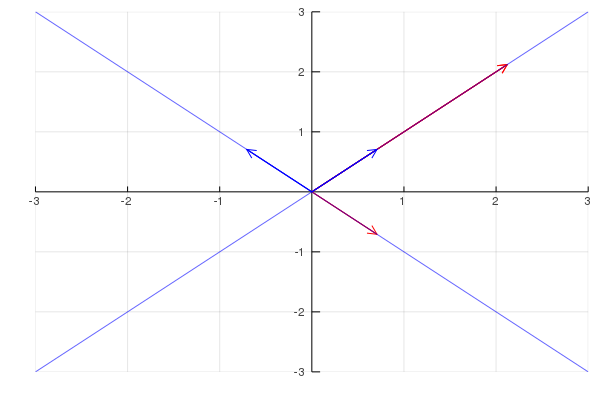

In [28]:
A = [1 2
     2 1]
evals, evecs = eigen(A)

a1, a2 = evals
eig_1 = [0 0; evecs[:,1]']
eig_2 = [0 0; evecs[:,2]']
x = range(-5, 5, length = 10)
y = -x

plot(eig_1[:, 2], a1 * eig_2[:, 2], arrow = true, color = :red,
     legend = :none, xlims = (-3, 3), ylims = (-3, 3), xticks = -3:3, yticks = -3:3,
     framestyle = :origin)
plot!(a2 * eig_1[:, 2], a2 * eig_2, arrow = true, color = :red)
plot!(eig_1, eig_2, arrow = true, color = :blue)
plot!(x, y, color = :blue, lw = 0.4, alpha = 0.6)
plot!(x, x, color = :blue, lw = 0.4, alpha = 0.6)

A equação do autovalor é equivalente a $ (A - \lambda I) v = 0 $, e isso tem uma solução não-nula $ v $ somente quando as colunas de $ A - \lambda I $ são linearmente dependentes.

Isso é equivalente a afirmar que o determinante é zero.

A partír daí, para encontrar todos os autovalores, nós podemos procurar por $ \lambda $ tal que o determinante de $ A - \lambda I $ seja zero.

Esse problema pode ser expresso como um de resolver para as raízes de um polinômio em $ \lambda $ de grau $ n $.

Isso por sua vez, implica a existência de $ n $ soluções no plano complexo, apesar de que alguns devem se repetir.

Alguns fatos sobre autovalores de uma matriz quadrada $ A $:

1. O determinante de $ A $ iguala o produto dos autovalores;  
2. O traço de $ A $ (a soma dos elementos da diagonal principal) é igual a soma dos autovalores;  
3. Se $ A $ é simétrica, então todos os autovalores são reais, e  
4. Se $ A $ é inversível e $ \lambda_1, \ldots, \lambda_n $ são seus autovalores, então os autovalores de $ A^{-1} $ são $ 1/\lambda_1, \ldots, 1/\lambda_n $.


Um corolário da primeira afirmação é que uma matriz é inversível se os seus autovalores são não-nulos.

Usando Julia, podemos resolver os autovalores e autovetores de uma matriz, como se segue:

In [29]:
A = [1.0 2.0; 2.0 1.0];

In [30]:
evals, evecs = eigen(A);

In [31]:
evals

2-element Array{Float64,1}:
 -1.0
  3.0

In [32]:
evecs

2×2 Array{Float64,2}:
 -0.707107  0.707107
  0.707107  0.707107

Note que as *colunas* de `evecs` são os autovetores.

Desde que qualquer múltiplo escalar de um autovetor seja um autovetor com o mesmo autovalor (check it), a auto rotina normaliza o comprimento de cada autovetor.

### Autovalores generalizados

É útil algumas vezes considerar o *problema do autovalor generalizado*, que para as dadas matrizes $ A $ e $ B $, busca autovalores generalizados $ \lambda $ e autovetores $ v $ tais que:

$$
A v = \lambda B v
$$

Isso pode ser solucionado no Julia via `eigen(A, B)`.

É claro, se $ B $ é quadrada e inversível, então nós podemos tratar o problema do autovalor generalizado como um problema de autovalor comum $ B^{-1}A v = \lambda v $, apesar deste não ser o caso de sempre.

## Tópicos Adicionais

Nós completamos nossa discussão pela breve menção de vários outros tópicos.

### Expansão em séries


<a id='index-18'></a>
Relembre da fórmula de somatório útil para uma progressão geométrica, enquanto afirma que se $ |a| < 1 $, então $ \sum_{k=0}^{\infty} a^k = (1 - a)^{-1} $.

Uma generalização dessa idéia também existe nas configurações de uma matriz.


<a id='la-mn'></a>

#### Normas matriciais


<a id='index-19'></a>
Seja $ A $ uma matriz quadrada, e seja

$$
\| A \| := \max_{\| x \| = 1} \| A x \|
$$

As normas do lado direito são normas vetoriais comuns, enquanto as normas no lado esquerdo são *normas matriciais* — nesse caso, chamadas de *normas espectrais*.

Por exemplo, para uma matriz quadrada $ S $, a condição $ \| S \| < 1 $ significa que $ S $ é *contrativa*, no sentido de que empurra todos os vetores para a origem <sup><a href=#cfn id=cfn-link>[1]</a></sup>.


<a id='la-neumann'></a>

#### Teorema de Neumann


<a id='index-21'></a>
Seja $ A $ uma matriz quadrada e $ A^k := A A^{k-1} $ com $ A^1 := A $.

Em outras palavras, $ A^k $ é o $ k $-ésimo poder de $ A $.

O teorema de Neumann afirma que: se $ \| A^k \| < 1 $ para algum $ k \in \mathbb{N} $, então $ I - A $ é inversível, e


<a id='equation-la-neumann'></a>
$$
(I - A)^{-1} = \sum_{k=0}^{\infty} A^k \tag{4}
$$


<a id='la-neumann-remarks'></a>

#### Raio Espectral


<a id='index-23'></a>
Um resultado conhecido como fórmula de Gelfand nos diz que, para qualquer matriz quadrada $ A $,

$$
\rho(A) = \lim_{k \to \infty} \| A^k \|^{1/k}
$$

Aqui $ \rho(A) $ é o *raio espectral*, definido como $ \max_i |\lambda_i| $, onde $ \{\lambda_i\}_i $ é o conjunto de autovalores de $ A $.

Como consequência da fórmula de Gelfand, se todos os autovalores são estritamente menores que um no módulo, então existe $ k $ com $ \| A^k \| < 1 $.

Em todo caso, [(4)](#equation-la-neumann) é válido.

### Matrizes Positivas Definidas


<a id='index-25'></a>
Seja $ A $ uma matriz simétrica $ n \times n $.

Nós dizemos que $ A $ é

1. *Positiva definida* se $ x' A x > 0 $ para cada $ x \in \mathbb R ^n \setminus \{0\} $, e  
2. *Positiva semi-definida* or *definida não-negativa* se $ x' A x \geq 0 $ para cada $ x \in \mathbb R ^n $  .


Definições análogas existem para matrizes negativas definidas ou semi-definidas.

É notável que se $ A $ é positiva definida, então todos os autovalores são estritamente positivos, sendo $ A $ inversível (com inversa definida positiva).


<a id='la-mcalc'></a>

### Diferenciação Linear e Formas Quadráticas


<a id='index-26'></a>
As fórmulas seguintes são úteis em muitos contextos econômicos. Seja

- $ z, x $ e $ a $ vetores $ n \times 1 $;  
- $ A $ seja uma matriz $ n  \times n $, e  
- $ B $ seja uma matriz $ m \times n $ e $ y $ seja um vetor $ m  \times 1 $.


Então:

1. $ \frac{\partial a' x}{\partial x} = a $  
2. $ \frac{\partial A x}{\partial x} = A' $  
3. $ \frac{\partial x'A x}{\partial x} = (A + A') x $  
4. $ \frac{\partial y'B z}{\partial y} = B z $  
5. $ \frac{\partial y'B z}{\partial B} = y z' $  


O exercício 1 abaixo pede que você aplique essas fórmulas.

### Leituras adicionais

A documentação das caractrísticas da álgebra linear construídas no Julia podem ser encontradas [aqui](https://docs.julialang.org/en/stable/manual/linear-algebra/).

Os capítulos 2 e 3 de [Econometric Theory](http://www.johnstachurski.net/emet.html) contém uma discussão da álgebra linear seguindo as mesmas linhas acima, com exercícios resolvidos.

Se você não se importa com uma abordagem um pouco abstrata, um bom texto intermediário de álgebra linear é [[Janich94]](https://lectures.quantecon.org/zreferences.html#janich1994).

## Exercícios

### Exercício 1

Seja $ x $ um $ n \times 1 $ vetor, e considere o problema

$$
v(x) =  \max_{y,u} \left\{ - y'P y - u' Q u \right\}
$$

sujeito à restrição linear

$$
y = A x + B u
$$

Aqui:

- $ P $ é uma matriz $ n \times n $ e $ Q $ é outra matriz $ m \times m $;  
- $ A $ é uma matriz $ n \times n $ e $ B $ é outra matriz $ n \times m $, e  
- ambas $ P $ e $ Q $são matrizes simétricas, positivas e semidefinidas.  


(Qual deve ser a dimensão de $ y $ e $ u $ para tornar este um problema bem colocado?)

Uma das formas de resolver este problema é por meio do Lagrangiano:

$$
\mathcal L = - y' P y - u' Q u + \lambda' \left[A x + B u - y\right]
$$

onde $ \lambda $ é um vetor $ n \times 1 $ de multiplicadores de Lagrange.

Tente aplicar as fórmulas dadas acima por diferenciação quadrática e formas lineares para obter as condições de primeira ordem e maximizar $ \mathcal L $ com respeito à $ y, u $ e minimizá-la com respeito à $ \lambda $.

Mostre que essas condições implicam que

1. $ \lambda = - 2 P y $  
2. A escolha ótima de $ u $ satisfaz $ u = - (Q + B' P B)^{-1} B' P A x $  
3. A função $ v $ satisfaz $ v(x) = - x' \tilde P x $ onde $ \tilde P = A' P A - A'P B (Q + B'P B)^{-1} B' P A $  


Como nós veremos, no contexto econômico, os multiplicadores de Lagrange se aplicam aos preços-sombra.

>**Observação**
>
>Se nós não se importarmos com os multiplicadores de Lagrange, nós podemos substituir a restrição na função objetivo,e então apenas maximizar $ -(Ax + Bu)'P (Ax + Bu) - u' Q u $ com respeito à $ u $.  VocÊ pode veriicar que isso lhe direciona ao mesmo maximizador.

## Soluções

Grato a [Willem Hekman](https://qutech.nl/person/willem-hekman/) e Guanlong Ren por providenciar essa solução.

### Exercício 1

Nós temos um problema de otimização:

$$
v(x) = \max_{y,u} \{ -y'Py - u'Qu \}
$$

s.t.

$$
y = Ax + Bu
$$

com primitivos:

- $ P $ seja uma matriz simétrica positiva e semi-definida $ n \times n $;  
- $ Q $ seja uma matriz simétrica positiva e semi-definida $ m \times m $;
- $ A $ uma matriz $ n \times n $, e  
- $ B $ uma matriz $ n \times m $.  


O Lagrangeano associado é :

$$
L = -y'Py - u'Qu + \lambda' \lbrack Ax + Bu - y \rbrack
$$

#### 1.

Diferenciando o Lagrangeano em relação a y e igualando a equação à zero, temos:

$$
\frac{ \partial L}{\partial y} = - (P + P') y - \lambda = - 2 P y - \lambda = 0 \:,
$$

desde que P seja simétrica.

Portanto, a condição de primeira ordem para maximizar L em relação a y implica que:

$$
\lambda = -2 Py \:.
$$

#### 2.

Diferenciando o Lagrangeano com relação a u e igualando a equação à zero, temos

$$
\frac{ \partial L}{\partial u} = - (Q + Q') u - B'\lambda = - 2Qu + B'\lambda = 0 \:.
$$

Substituíndo $ \lambda = -2 P y $ tem-se:

$$
Qu + B'Py = 0 \:.
$$

Substituíndo a restrição linear $ y = Ax + Bu $ na equação acima, temos:

$$
Qu + B'P(Ax + Bu) = 0
$$

$$
(Q + B'PB)u + B'PAx = 0
$$

que são as condições de primeira ordem para maximizar L em relação a u.

Assim, a escolha ótima de u deve satisfazer:

$$
u = -(Q + B'PB)^{-1}B'PAx \:,
$$

que se segue da definição de condições de primeira ordem dos multiplicadores de Lagrange.

#### 3.

Reescrevendo nosso problema via substituição na função-objetivo, temos

$$
v(x) = \max_{u} \{ -(Ax+ Bu)'P(Ax+Bu) - u'Qu \} \:.
$$

Já que sabemos que a escolha ótima de u satisfaz \$ u = -(Q + B’PB)^{-1}B’PAx \$, então

$$
v(x) =  -(Ax+ B u)'P(Ax+B u) - u'Q u  \,\,\,\, with \,\,\,\, u = -(Q + B'PB)^{-1}B'PAx
$$

Para avaliar a função:

$$
\begin{align}
v(x) &=  -(Ax+ B u)'P(Ax+Bu) - u'Q u \\
&= -(x'A' + u'B')P(Ax+Bu) - u'Q u \\
&= - x'A'PAx - u'B'PAx - x'A'PBu - u'B'PBu - u'Qu \\
&= - x'A'PAx - 2u'B'PAx - u'(Q + B'PB) u
\end{align}
$$

Para simplificar, denote por $ S := (Q + B'PB)^{-1} B'PA $, assim \$ u = -Sx\$.

A respeito do segundo termo $ - 2u'B'PAx $,

$$
\begin{align}
- 2u'B'PAx &= -2 x'S'B'PAx  \\
& = 2 x'A'PB( Q + B'PB)^{-1} B'PAx
\end{align}
$$

Note que o termo $ (Q + B'PB)^{-1} $ é tão simétrico quanto ambos P and Q.

Em relação ao terceiro termo $ - u'(Q + B'PB) u $,

$$
\begin{align}
- u'(Q + B'PB) u &= - x'S' (Q + B'PB)Sx \\
&= -x'A'PB(Q + B'PB)^{-1}B'PAx
\end{align}
$$

Por consequência, a soma dos segundo e terceiro termos é $ x'A'PB(Q + B'PB)^{-1}B'PAx $.

Isso implica que

$$
\begin{align}
 v(x) &= - x'A'PAx - 2u'B'PAx - u'(Q + B'PB) u\\
 &= - x'A'PAx + x'A'PB(Q + B'PB)^{-1}B'PAx \\
 &= -x'[A'PA - A'PB(Q + B'PB)^{-1}B'PA] x
\end{align}
$$

Portanto, a solução para o problema de otimização $ v(x) = -x' \tilde{P}x $ segue o resultado acima, denotado por $ \tilde{P} := A'PA - A'PB(Q + B'PB)^{-1}B'PA $.

**Rodapé**

<p><a id=cfn href=#cfn-link><strong>[1]</strong></a> Suponha que $ \|S \| < 1 $. Pegue um vetor não-nulo $ x $, e faça $ r := \|x\| $. Nós teremos $ \| Sx \| = r \| S (x/r) \| \leq r \| S \| < r = \| x\| $. Assim, cada ponto será empurrado para a origem.